In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity
from torch.utils.data import DataLoader

from models.MeTooDataset import MeTooDataset

In [2]:
experiment_name = '10A'

In [3]:
profile_ids = [783214, 19568591, 25073877, 103018203, 256881576, 810619093749559296]

In [4]:
labels = list('ABCDEF')

# Actual Topic Vectors based on Means of Stances

In [5]:
obj_stance_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='word_embeddings',
    task='stance_testing',
    target='Objectification of Women'
)

In [6]:
gen_stance_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='word_embeddings',
    task='stance_testing',
    target='Gender Equality'
)

In [7]:
con_stance_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='word_embeddings',
    task='stance_testing',
    target='Conservatism'
)

In [8]:
obj_df = pd.DataFrame(
    [
        obj_stance_testing_dataset.id,
        obj_stance_testing_dataset.y
    ],
).transpose()

obj_df['target'] = 'Objectification of Women'

In [9]:
gen_df = pd.DataFrame(
    [
        gen_stance_testing_dataset.id,
        gen_stance_testing_dataset.y
    ],
    
).transpose()

gen_df['target'] = 'Gender Equality'

In [10]:
con_df = pd.DataFrame(
    [
        con_stance_testing_dataset.id,
        con_stance_testing_dataset.y
    ]
).transpose()

con_df['target'] = 'Conservatism'

In [11]:
df = pd.concat([obj_df, gen_df, con_df])

In [12]:
df['stance'] = df['stance'].apply(lambda x: x - 1)

In [13]:
new_df = df.groupby(['user_id', 'target']).mean().unstack()['stance']

In [14]:
new_df = new_df[['Objectification of Women', 'Gender Equality', 'Conservatism']]

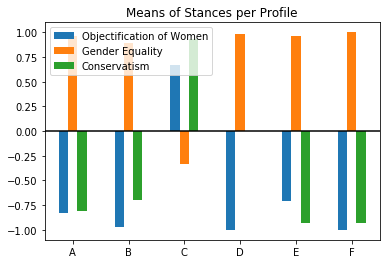

In [15]:
new_df.plot(kind='bar', title='Means of Stances per Profile', legend=True, rot=0)
plt.axhline(0, color='k')
plt.xlabel("")
plt.xticks(np.arange(len(labels)), labels)
plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_stances.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [16]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/means_of_stances.tex', 'w') as f:
    new_df.to_latex(f)

# Stances based on Topic Vectors and #MeToo Vector

In [17]:
metoo_vector = np.array([-1, 1, -1]).reshape(1, -1)

In [18]:
stances_df = pd.DataFrame.from_dict(
    {
        user_id: {
            'Stance': float(cosine_similarity(metoo_vector, new_df.loc[user_id].values.reshape(1, -1)))
        }
        for user_id in profile_ids
    },
    orient='index'
)

In [19]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/metoo_stances_based_on_profiles.tex', 'w') as f:
    stances_df.to_latex(f)

# Stances towards #MeToo based on #MeToo Dataset

In [20]:
metoo_stance_testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data/',
    mode='word_embeddings',
    task='metoo_testing'
)

In [21]:
dataloader = DataLoader(metoo_stance_testing_dataset)

In [22]:
metoo_stance_df = pd.DataFrame.from_dict(
    {
        user_id: {
            'Stance': np.mean(
                [
                    float(stance)
                    for _, (_, stance, _user_id) in enumerate(dataloader)
                    if _user_id == user_id
                ]
            )
        }
        for user_id in profile_ids if not user_id == 25073877
    },
    orient='index'
).applymap(lambda x: x - 1.0)

In [23]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/metoo_stances_based_on_metoo.tex', 'w') as f:
    metoo_stance_df.to_latex(f)